In [14]:
# Setup and Data Loading
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

# Clone repository if not exists and load data
if not os.path.exists('2155-Challenge-Problem-2'):
    import subprocess
    print("Cloning repository...")
    subprocess.run(['git', 'clone', 'https://github.com/Lyleregenwetter/2155-Challenge-Problem-2'], 
                   check=True, cwd='.')
    print("Repository cloned!")

# Change to the repository directory and load data
os.chdir('2155-Challenge-Problem-2')

# Import utilities
from utils_public import load_grids, plot_n_grids

print("Loading data...")
grids = load_grids()
ratings = np.load("datasets/scores.npy")

print(f"Grids shape: {grids.shape}")
print(f"Ratings shape: {ratings.shape}")
print(f"Available ratings per advisor: {(~np.isnan(ratings)).sum(axis=0)}")

# advisor_names = ["Wellness", "Tax", "Transportation", "Business"]

# Change back to parent directory for saving results
os.chdir('..')

Loading data...
Grids shape: (500000, 7, 7)
Ratings shape: (500000, 4)
Available ratings per advisor: [5000 5000 5000 5000]


In [15]:
# Reload the oracle module to get the latest changes
import importlib
import sys
if 'oracle' in sys.modules:
    importlib.reload(sys.modules['oracle'])
from oracle import BusinessOracle

# Initialize Business Oracle
business_oracle = BusinessOracle()
print("Business Oracle initialized!")

# Select grids and ratings for Business advisor (not nan, index 3)
business_index = 3
grids_subset = grids[~np.isnan(ratings[:, business_index])]
ratings_subset = ratings[~np.isnan(ratings[:, business_index]), business_index]

# Get model scores
model_scores, train_data, test_data = business_oracle.fit_model(grids_subset, ratings_subset)
print("Model Scores:", model_scores)

predictions = business_oracle.predict(grids_subset)
print("Predictions shape:", predictions.shape)

Business Oracle initialized!

Training AutoGluon model for Business Advisor
Available training samples: 5000
Creating features...
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...
Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...
Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...


No path specified. Models will be saved in: "AutogluonModels\ag-20251027_173250"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       15.12 GB / 31.67 GB (47.8%)
Disk Space Avail:   729.72 GB / 951.65 GB (76.7%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies o

Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4


Leaderboard on holdout data (DyStack):
                 model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L2       0.974566   0.963541          r2        2.532032       4.759718  30.117308                 0.544759                0.624814           8.678792            2       True          3
1  WeightedEnsemble_L3       0.974566   0.963541          r2        2.555147       4.759718  30.180182                 0.023115                0.000000           0.062875            3       True          4
2    LightGBMXT_BAG_L1       0.944714   0.938267          r2        1.987273       4.134905  21.438515                 1.987273                4.134905          21.438515            1       True          1
3  WeightedEnsemble_L2       0.944714   0.938267          r2        2.014519       4.136937  21.445671                 0.027246          

Model Scores: 0.9808131126686743
Creating features for all 5000 grids...
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...
Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4
Making predictions with AutoGluon model...
Predictions shape: (5000,)


Making predictions on train set...
Making predictions on test set...


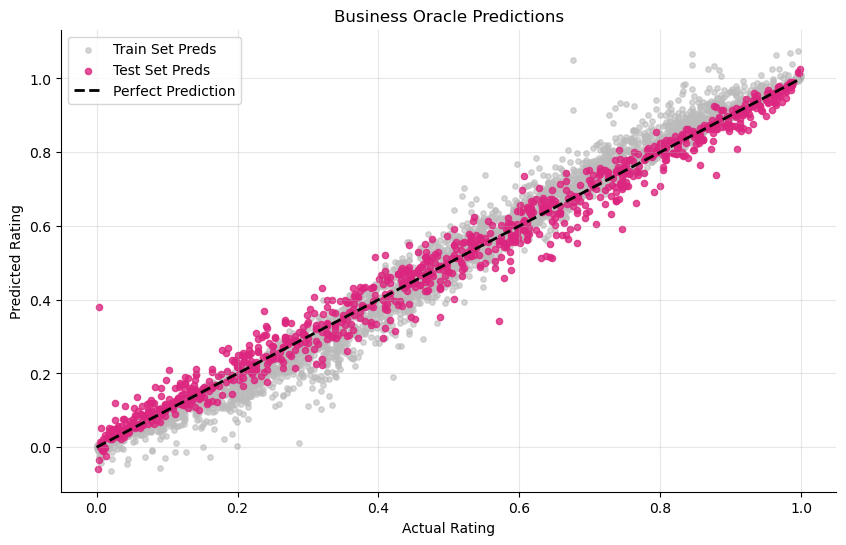

Business Oracle Train Set R² score: 0.9763
Business Oracle Test Set R² score: 0.9808

Model Performance Summary:
Training R²:   0.9763
Test R²:       0.9808
Overfitting:   No (-0.0046)
Performance:   Excellent


In [16]:
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test):
    #Create scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=15, c="#BBBBBB", alpha=0.6) #train set in gray
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=20, c="#DC267F", alpha=0.8) #test set in magenta
    plt.plot([0,1], [0,1], label="Perfect Prediction", linewidth=2, c="k", linestyle='--') #target line in black

    #Set axis labels and title
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title("Business Oracle Predictions")

    #Turn off top and right spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend() #Display legend
    plt.grid(True, alpha=0.3)
    plt.show() #Show plot

    #Calculate R2 score for train and test sets
    train_r2 = r2_score(ratings_train, preds_train)
    test_r2 = r2_score(ratings_test, preds_test)
    
    print(f"Business Oracle Train Set R² score: {train_r2:.4f}")
    print(f"Business Oracle Test Set R² score: {test_r2:.4f}")
    
    return train_r2, test_r2

# Extract the actual ratings from train and test data
ratings_train = train_data['target'].values
ratings_test = test_data['target'].values

# Remove the target column to get just the features for prediction
train_features = train_data.drop('target', axis=1)
test_features = test_data.drop('target', axis=1)

# Make predictions on the train and test features
print("Making predictions on train set...")
preds_train = business_oracle.model.predict(train_features)

print("Making predictions on test set...")
preds_test = business_oracle.model.predict(test_features)

# Create the plot and get R² scores
train_r2, test_r2 = plot_and_r2(preds_train, preds_test, ratings_train, ratings_test)

# Additional analysis
print(f"\nModel Performance Summary:")
print(f"{'='*40}")
print(f"Training R²:   {train_r2:.4f}")
print(f"Test R²:       {test_r2:.4f}")
print(f"Overfitting:   {'Yes' if (train_r2 - test_r2) > 0.1 else 'No'} ({train_r2 - test_r2:.4f})")
print(f"Performance:   {'Excellent' if test_r2 > 0.9 else 'Good' if test_r2 > 0.8 else 'Fair' if test_r2 > 0.6 else 'Poor'}")

In [17]:
# save model in pkl file
business_oracle.save_model()

# --- IGNORE ---
# instructions on how to use exported model
# from oracle import BusinessOracle
# business_oracle = BusinessOracle.load_model("business_oracle_model.pkl")
# --- IGNORE ---